In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle
from scipy.signal import savgol_filter

In [3]:
font = {"size":20}
matplotlib.rc("font", **font)

In [4]:
def spines(ax = None):
    if ax == None:
        ax = plt.gca()
    dict(ax.spines.items())["left"].set_position(('outward', 10))
    dict(ax.spines.items())["bottom"].set_position(('outward', 10))
    dict(ax.spines.items())["top"].set_position(('outward', 10))
    dict(ax.spines.items())["right"].set_position(('outward', 10))
    
def annotate_distance(ax, text, point1, point2, linestyle, fontsize, textoffset = (0.1,0)):
    ax.annotate('', point1, point2, \
            arrowprops={'arrowstyle':'<->', 'linestyle':linestyle, "facecolor":"black"}, fontsize=fontsize);
    ax.annotate(text, point1, (0.5*(point1[0]+point2[0])+textoffset[0], 0.5*(point1[1]+point2[1])+textoffset[1]),
                fontsize=fontsize)

## Калибровка потока 

## II

In [4]:
with open("fitting_data/xmons-first-try-2nd-res-anticrossings.pkl", "rb") as f:
    data3 = pickle.load(f)

(5.7, 5.8)

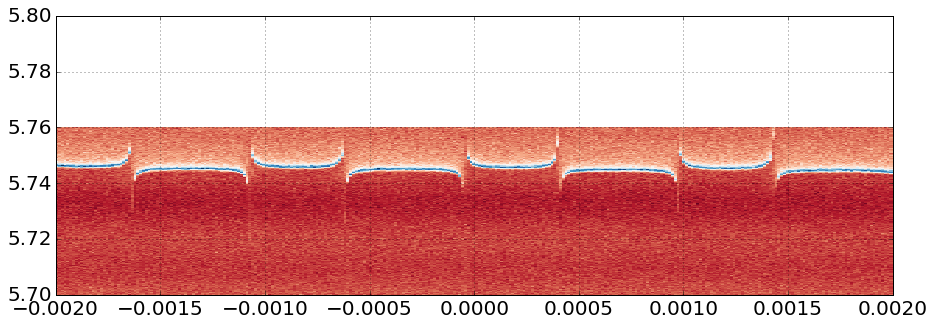

In [12]:
plt.pcolormesh(data3[1][0], data3[1][1]/1e9, data3[1][2].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
plt.ylim(5.7,5.8)

In [13]:
data3[1][1][250]/1e9

5.7501672240000001

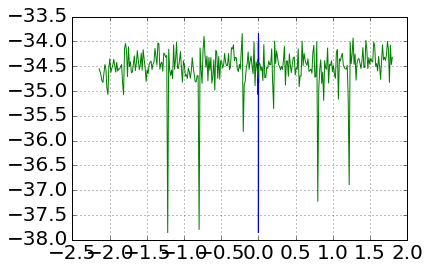

In [14]:
plt.plot(data3[1][0], data3[1][2][:,250])
dips = data3[1][0][data3[1][2][:,250]<-36]
l, r = dips[0], dips[-1]
ys, bins = histogram(dips, 100)
xs = ((bins[:-1]+bins[1:])/2)[ys>0]
Φ_0 = (xs[2]-xs[0])/2
plt.plot((data3[1][0]-(l+r)/2)/Φ_0, data3[1][2][:,250])
plt.grid()

## VI

In [5]:
with open("../Samples/May 25 2016/17-49-07/xmons-first-try-6th-res-zoom.pkl", "rb") as f:
    data6 = pickle.load(f)[1]

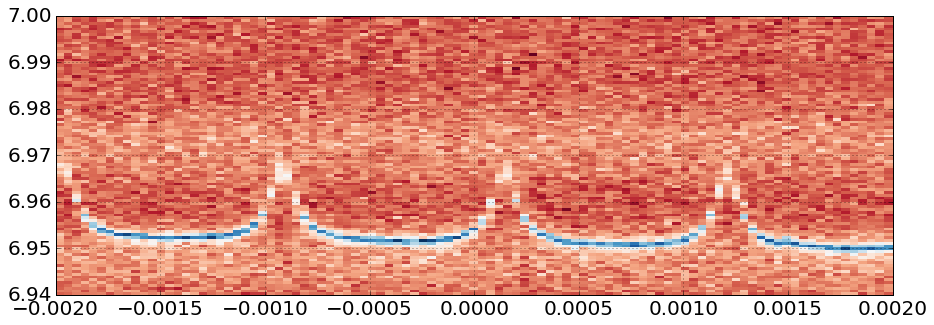

In [6]:
plt.pcolormesh(data6[0], data6[1]/1e9, data6[2].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
# plt.ylim(5.7,5.8)

In [7]:
data6[1][25]/1e9

6.9551515149999998

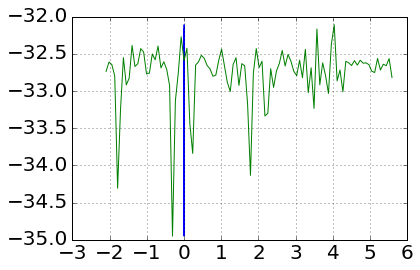

In [8]:
plt.plot(data6[0], data6[2][:,25])
dips = data6[0][data6[2][:,25]<-33.5]
l, r = dips[0], dips[-1]
ys, bins = histogram(dips, 100)
xs = ((bins[:-1]+bins[1:])/2)[ys>0]
Φ_0 = (xs[2]-xs[0])/2
plt.plot((data6[0]-(l+r)/2)/Φ_0, data6[2][:,25])
plt.grid()

## Антикроссинг

##  II

In [90]:
with open("fitting_data/xmons-first-try-2nd-res-anticrossing-high-_res.pkl", "rb") as f:
    data = pickle.load(f)

(5.7, 5.8)

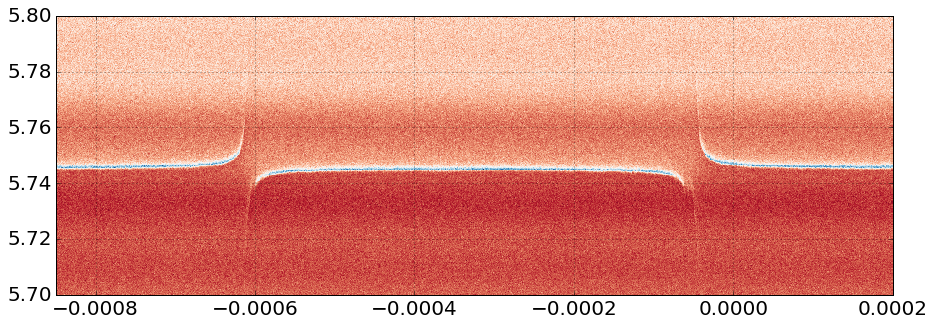

In [5]:
plt.pcolormesh(data[1][0], data[1][1]/1e9, data[1][2].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
plt.ylim(5.7,5.8)

In [101]:
data[1][1][data[1][2][0]<-37]

array([  5.74564565e+09,   5.74594595e+09,   5.74624625e+09])

In [104]:
data[1][1][495]/1e9

5.7486486489999997

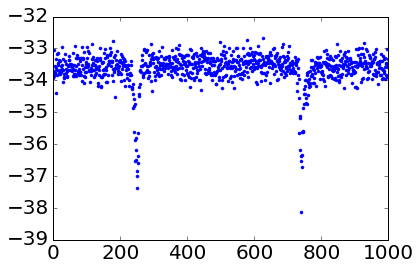

In [109]:
plt.plot(data[1][2][:,475], '.')

Center: -0.000327627627628


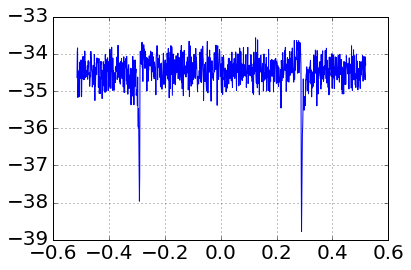

In [113]:
centers = []
for slice_n in range(475, 500):
    l, r = data[1][0][data[1][2][:,slice_n]<-37][0], data[1][0][data[1][2][:,slice_n]<-37][-1]
    centers.append(l/2+r/2)

print("Center:", l/2+r/2)
plt.plot((data[1][0]-mean(centers))/Φ_0, data[1][2][:,500])
plt.grid()

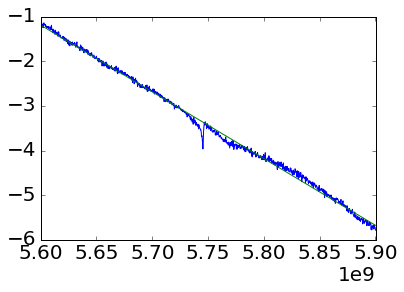

In [170]:
plt.plot(data[1][1], unwrap(data[1][3][0]))
a, b = polyfit(data[1][1], unwrap(data[1][3][0]), 1)
plt.plot(data[1][1], data[1][1]*a+b)
# plt.plot(savgol_filter(data[1][3][0], 51, 3))

In [56]:
with open("fitting_data/xmons-first-try-2nd-res-anticrossing-high-res-calibrated.pkl", "wb") as f:
    pickle.dump(((data[1][0]-(l+r)/2)/Φ_0, data[1][1], data[1][2]-savgol_filter(data[1][2][0], 101, 3), unwrap(data[1][3])-data[1][1]*a+b), f)

NameError: name 'data' is not defined

## VI

In [9]:
with open("fitting_data/xmons-first-try-6th-res.pkl", "rb") as f:
    data6 = pickle.load(f)

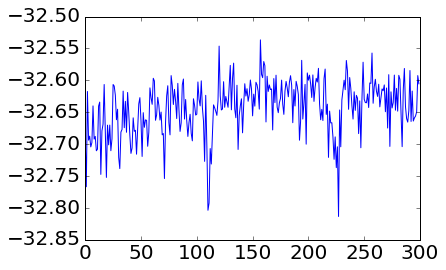

In [10]:
plt.plot(data6[1][2][:, 220])

In [11]:
l,r = data6[1][0][data6[1][2][:,220]<-32.8]

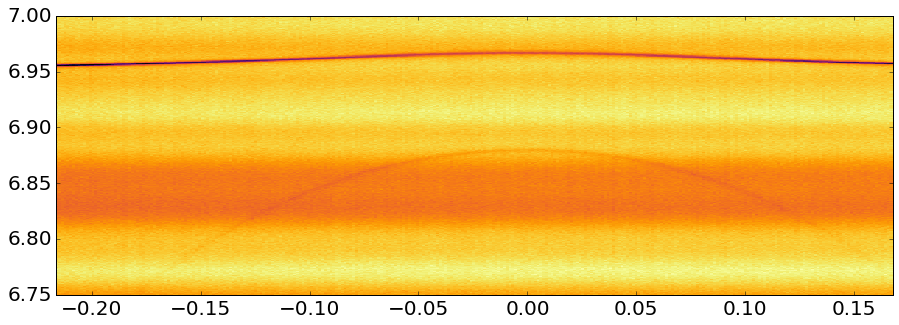

In [13]:
plt.pcolormesh((data6[1][0]-(l+r)/2)/Φ_0, data6[1][1]/1e9, data6[1][2].T, cmap='inferno')
plt.gca().axis('tight')
plt.gcf().set_size_inches(15,5)

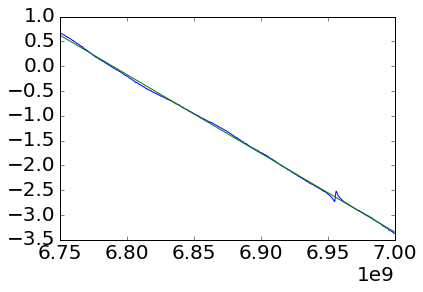

In [14]:
plt.plot(data6[1][1], unwrap(data6[1][3][0]))
a, b = polyfit(data6[1][1], unwrap(data6[1][3][0]), 1)
plt.plot(data6[1][1], data6[1][1]*a+b)
# plt.plot(savgol_filter(data[1][3][0], 51, 3))

In [55]:
with open("fitting_data/xmons-first-try-6th-res-anticrossing-calibrated.pkl", "wb") as f:
    pickle.dump(((data6[1][0]-(l+r)/2)/Φ_0/2, data6[1][1], data6[1][2]-savgol_filter(data6[1][2][0], 101, 3), unwrap(data6[1][3])-data6[1][1]*a-b), f)

## Двухтоновые спектры

## II

### Низкая мощность

In [240]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_bigger_zone.pkl", "rb") as f:
    data2 = pickle.load(f)

In [241]:
data2[1][1][150]/1e9

5.7515030060120242

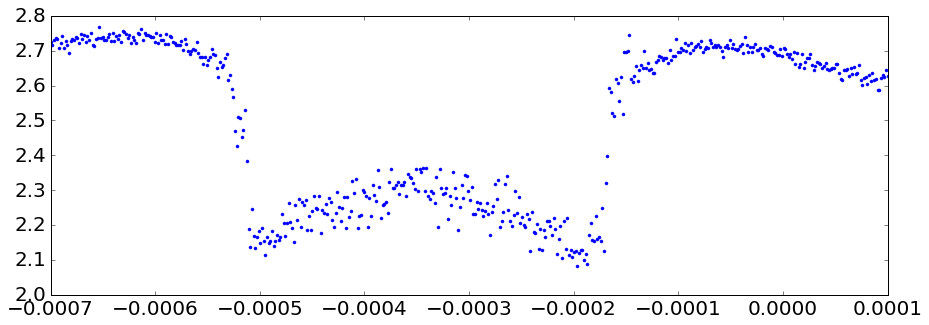

In [243]:
plt.plot(data2[1][0], data2[1][4][:, 150], ".")
mask = logical_and(data2[1][4][:, 150]>2.35, data2[1][4][:, 150]<2.4)
walls = data2[1][0][mask]
l, r = walls[0], walls[-1]
gcf().set_size_inches(15,5)

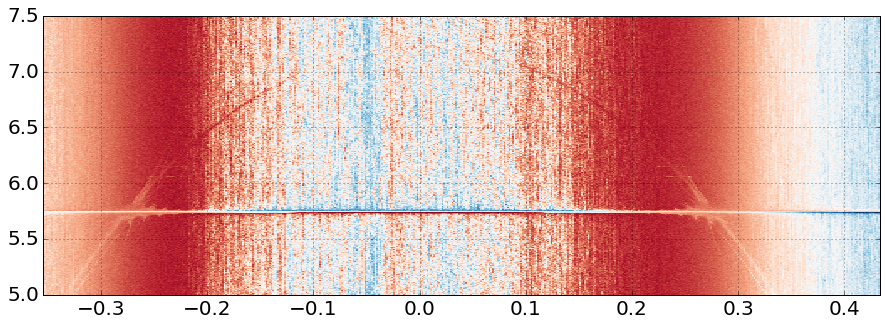

In [220]:
plt.pcolormesh((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1]/1e9, data2[1][4].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
# plt.ylim(5.5,6)

In [223]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_bigger_zone-calibrated.pkl", "wb") as f:
    pickle.dump(((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1], data2[1][3], data2[1][4]), f)

### Средняя мощность

In [7]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_high_power.pkl", "rb") as f:
    data2 = pickle.load(f)

In [8]:
data2[1][1][75]/1e9

5.7530120481927707

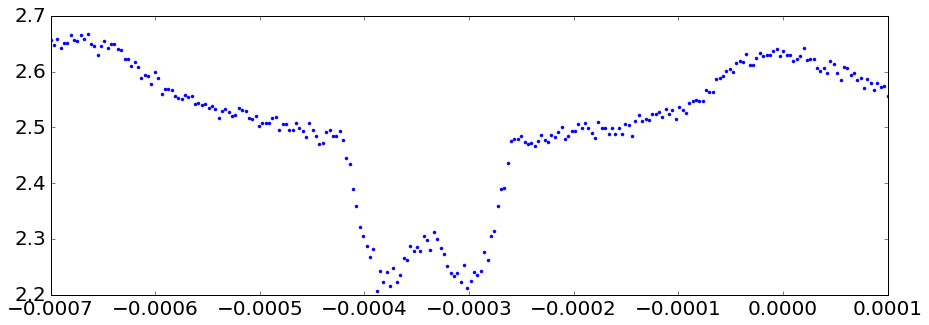

In [16]:
plt.plot(data2[1][0], data2[1][4][:, 75], ".")
mask = logical_and(data2[1][4][:, 75]>2.35, data2[1][4][:, 75]<2.4)
walls = data2[1][0][mask]
l, r = walls[0], walls[-1]
gcf().set_size_inches(15,5)

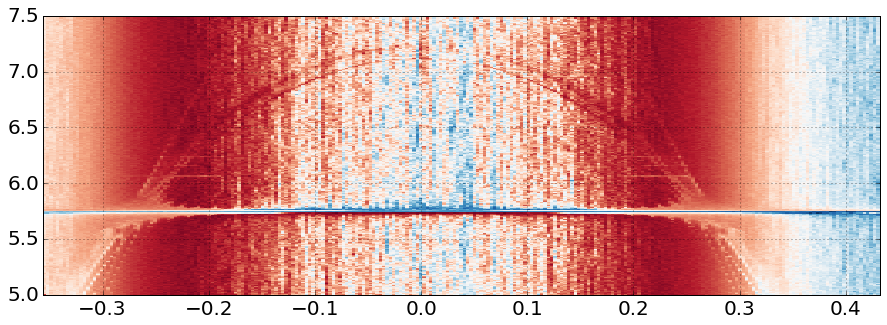

In [17]:
plt.pcolormesh((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1]/1e9, data2[1][4].T, cmap='RdBu_r')
plt.gcf().set_size_inches(15,5)
gca().axis('tight')
plt.grid()
# plt.ylim(5.5,6)

In [248]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_high_power-calibrated.pkl", "wb") as f:
    pickle.dump(((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1], data2[1][3], data2[1][4]), f)

### Зум двухтонового спектра 

In [22]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_-10dBm_upper_zone.pkl", "rb") as f:
    data2 = pickle.load(f)

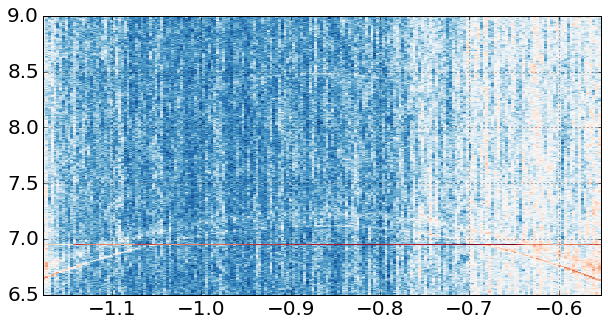

In [23]:
plt.pcolormesh((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1]/1e9, data2[1][3].T, cmap='RdBu_r')
plt.gcf().set_size_inches(10,5)
gca().axis('tight')
plt.grid()
# plt.ylim(5.5,6)

In [24]:
with open("fitting_data/xmons-first-try-2nd-res-2tone_-10dBm_upper_zone-calibrated.pkl", "wb") as f:
    pickle.dump(((data2[1][0]-(l+r)/2)/Φ_0, data2[1][1], data2[1][3], data2[1][4]), f)

## I

(array([  3.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   5.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   1.20000000e+01,   1.80000000e+01,
          8.00000000e+00,   1.50000000e+01,   1.01000000e+02,
          5.70000000e+02,   1.74500000e+03,   3.21000000e+03,
          3.26200000e+03,   2.14200000e+03,   1.25200000e+03,
          6.62000000e+02,   4.14000000e+02,   2.32000000e+02,
          1.72000000e+02,   1.24000000e+02,   8.30000000e+01,
          6.80000000e+01,   4.60000000e+01,   3.20000000e+01,
          4.20000000e+01,   4.30000000e+01,   4.40000000e+01,
          4.00000000e+01,   3.60000000e+01,   5.40000000e+01,
          7.40000000e+01,   2.90000000e+01,   1.00000000e+00,
        

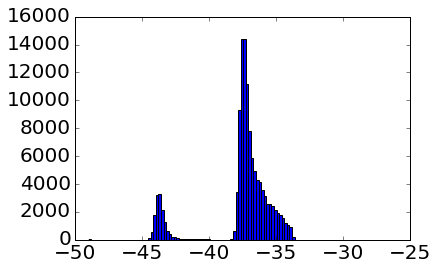

In [7]:
hist(list(flatten(unwrap(unwrap(exp_amps.T).T))), bins=100)

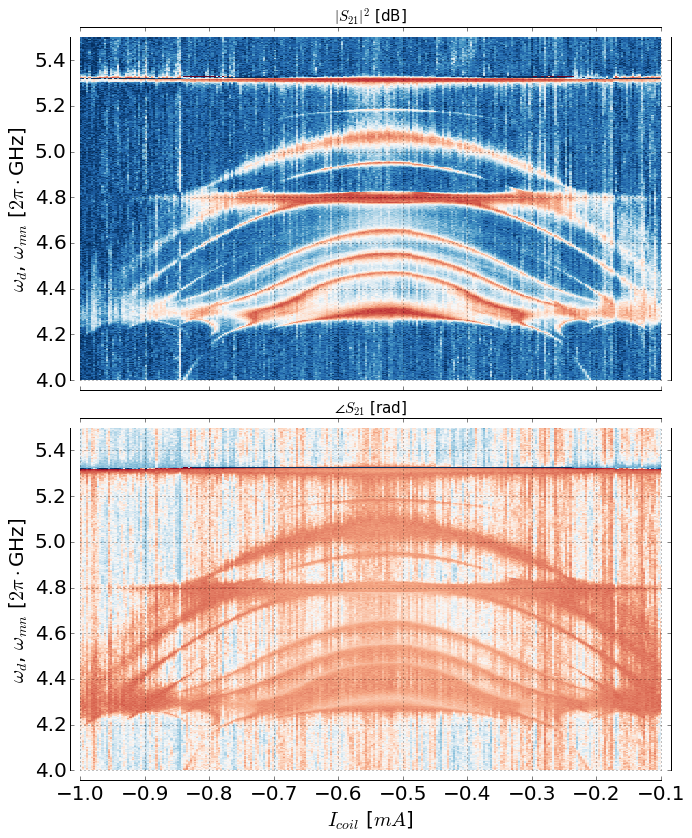

In [16]:
with open("fitting_data/xmons-first-try-1st-res-2tone.pkl", "rb") as f:
    data1 = pickle.load(f)[1]

exp_Φs = data1[0]
exp_freqs = data1[1]
exp_amps = data1[3].T
exp_phas = data1[4].T

fig, axes = plt.subplots(2, 1, figsize = (10,12))

axes[0].pcolormesh(exp_Φs*1e3, exp_freqs/1e9, exp_amps, cmap='RdBu_r', rasterized=True, vmax=-33, vmin=-38)
axes[1].pcolormesh(exp_Φs*1e3, exp_freqs/1e9, unwrap(unwrap(exp_phas.T).T), cmap='RdBu_r', 
                   rasterized=True, vmin=2.5, vmax=3.5)


for ax in axes:
    
    ax.set_xticks(linspace(-1, -0.1, 10))

    spines(ax)

    ax.set_xlim(-1, -0.1)
    ax.set_ylim(4, 5.5)


    ax.set_ylabel("$\omega_d$, $\omega_{mn}$ [$2\pi\cdot$GHz]")
    plt.xlabel("$I_{coil}$ [$mA$]")
    ax.grid()

#     ax.legend(ncol=1,loc=1, fontsize=13, fancybox=True)
axes[0].set_xticklabels([])
axes[0].set_title(r"$|S_{21}|^2$ [dB]", fontsize=15, y=1.03)
axes[1].set_title(r"$\angle S_{21}$ [rad]", fontsize=15, y=1.03)
plt.tight_layout(h_pad=0.5)
plt.savefig("2tone_raw.pdf", bbox_inches='tight')

## VI

In [15]:
with open("fitting_data/xmons-first-try-6th-res-2tone.pkl", "rb") as f:
    data6 = pickle.load(f)

(-0.50481742973472643, 0.55205368827769585, 6.0, 7.2000000000000002)

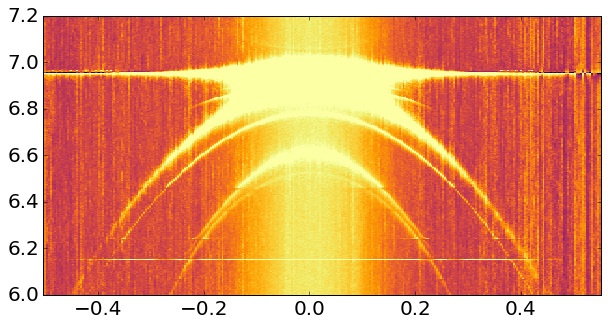

In [16]:
plt.pcolormesh((data6[1][0]-(l+r)/2)/Φ_0, data6[1][1]/1e9, data6[1][3].T, cmap='inferno', vmax=-33, vmin=-38)
plt.gcf().set_size_inches(10,5)
gca().axis('tight')
# plt.colorbar()
# plt.ylim(5.5,6)

In [25]:
with open("fitting_data/xmons-first-try-6th-res-2tone-calibrated.pkl", "wb") as f:
    pickle.dump(((data6[1][0]-(l+r)/2)/Φ_0/2, data6[1][1], data6[1][3], data6[1][4]), f)

# Chip 2 time domain 

In [167]:
mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

In [10]:
from scipy.optimize import curve_fit

In [30]:
with open("/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Second chip (Xmon Al BMSTU 1)/Apr 7 2017/xmon_al_bmstu_1-I-rabi-fit.pkl", "rb") as f:
    data = pickle.load(f)

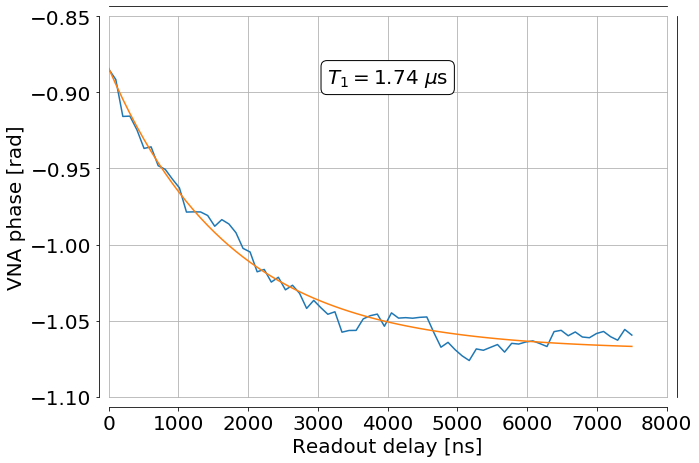

In [29]:
delays, z_data = data
def theoretical_decay(t, gamma, A, offset):
    return A*exp(-gamma*t) + offset
opt_params = curve_fit(theoretical_decay, delays[:], z_data[:], p0=(0.001, 1, -0.8))[0]
plot(delays, z_data)
plot(delays, theoretical_decay(delays, *opt_params))
spines()
xlabel("Readout delay [ns]")
ylabel("VNA phase [rad]")
bbox_props = dict(boxstyle="round", fc="white", ec="black", lw=1)
annotate("$T_1=%.2f\ \mu$s"%(1/opt_params[0]/1e3), (mean(gca().get_xlim()), z_data[0]*1.01), bbox=bbox_props, ha="center")
plt.grid()
plt.gcf().set_size_inches(10,7)
plt.savefig("second_I_relax.pdf", bbox_inches="tight")

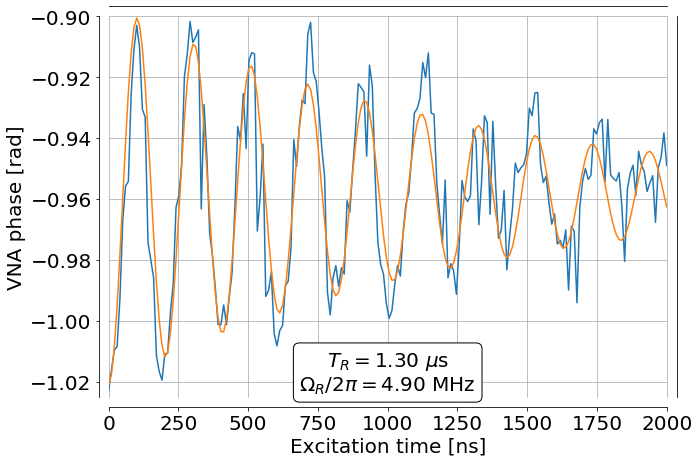

In [31]:
excitation_times, z_data = data
def theoretical_rabi(t, A, gamma_R, Omega_R, offset):
    return A*exp(-gamma_R*t)*cos(Omega_R*t)+offset
opt_params = curve_fit(theoretical_rabi, excitation_times[:], z_data, (.1, 1.5e-3, 5e-2, -0.96))[0]
plot(excitation_times, z_data)
plot(excitation_times, theoretical_rabi(excitation_times, *opt_params))
spines()
xlabel("Excitation time [ns]")
ylabel("VNA phase [rad]")
bbox_props = dict(boxstyle="round", fc="white", ec="black", lw=1)
annotate("$T_R=%.2f\ \mu$s\n$\Omega_R/2\pi = %.2f$ MHz"%(1/opt_params[1]/1e3, opt_params[2]*1e3/2/pi), (mean(gca().get_xlim()),  z_data[0]), bbox=bbox_props, ha="center")
plt.grid()
plt.gcf().set_size_inches(10,7)
plt.savefig("second_I_rabi.pdf", bbox_inches="tight")

# Chip 3 anticrossings

In [82]:
from int_to_roman import int_to_roman

In [55]:
file1 = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 23 2017/18-31-13 - I-anticrossing-through-mixer/I-anticrossing-through-mixer_raw_data.pkl"
file3 = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 23 2017/18-57-16 - II-anticrossing-through-mixer/II-anticrossing-through-mixer_raw_data.pkl"
file4 = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 23 2017/19-04-44 - III-anticrossing-through-mixer/III-anticrossing-through-mixer_raw_data.pkl"
file5 = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 23 2017/19-07-05 - IV-anticrossing-through-mixer/IV-anticrossing-through-mixer_raw_data.pkl"
file6 = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 19 2017/17-22-35 - VI-anticrossing/VI-anticrossing_raw_data.pkl"

In [56]:
plots = []
for file in [file1, file3, file4, file5, file6]:
    with open(file, "rb") as f:
        plots.append(pickle.load(f))

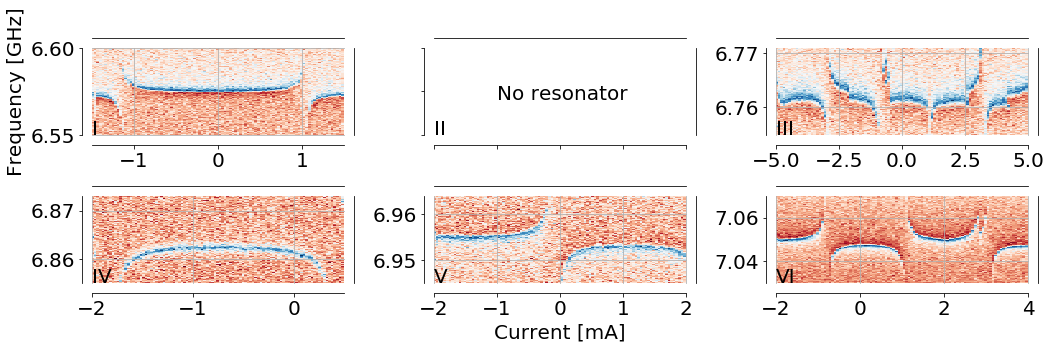

In [95]:
fig, axes = plt.subplots(2, 3, figsize=(15,5))
plot_idx = 0
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

for idx, ax in enumerate(axes.ravel()):
    
    if idx==1:
        ax.annotate("No resonator",(0,0), (0.25, 0.4))
        spines(ax)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.annotate("%s"%int_to_roman(idx+1),(ax.get_xlim()[0], ax.get_ylim()[0]))
        continue
    
    data = plots[plot_idx]
    try:
        freqs, curs, s_data = data["frequency"], data["current"], data["s_data"]
    except KeyError:
        freqs, curs, s_data = data["frequencies"], data["currents"], data["s_data"]
    ax.pcolormesh(curs*1e3, freqs/1e9, abs(s_data.T), cmap="RdBu_r", rasterized=True)
    spines(ax)
    ax.grid()
    ax.axis("tight")
    plot_idx+=1
    ax.annotate("%s"%int_to_roman(idx+1),(ax.get_xlim()[0], ax.get_ylim()[0]))

axes[0,0].set_ylabel("Frequency [GHz]")
axes[1,1].set_xlabel("Current [mA]")
plt.tight_layout()
plt.savefig("third_anticrossings.pdf", bbox_inches="tight")

In [211]:
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 22 2017/00-53-34 - VI-2tone/VI-2tone_raw_data.pkl"
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 21 2017/23-29-56 - VI-2tone/VI-2tone_raw_data.pkl"

In [212]:
with open(file, "rb") as f:
    data = pickle.load(f)

In [213]:
freqs, curs, s_data = data["frequency"], data["Current [A]"], data["s_data"]

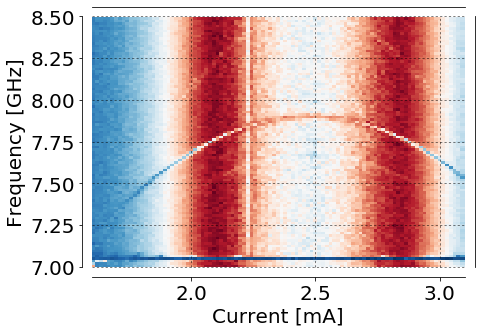

In [214]:
pcolormesh(curs*1e3, freqs/1e9, angle(s_data).T, cmap="RdBu_r", rasterized=True)
spines()
axis("tight")
plt.gcf().set_size_inches(7,5)
plt.ylabel("Frequency [GHz]")
grid()
xlabel("Current [mA]")
tight_layout()
plt.savefig("third-VI-2tone_lp.pdf", bbox_inches="tight")

In [164]:
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 22 2017/13-23-30 - VI-powerscan/VI-powerscan_raw_data.pkl"

In [165]:
with open(file, "rb") as f:
    data = pickle.load(f)

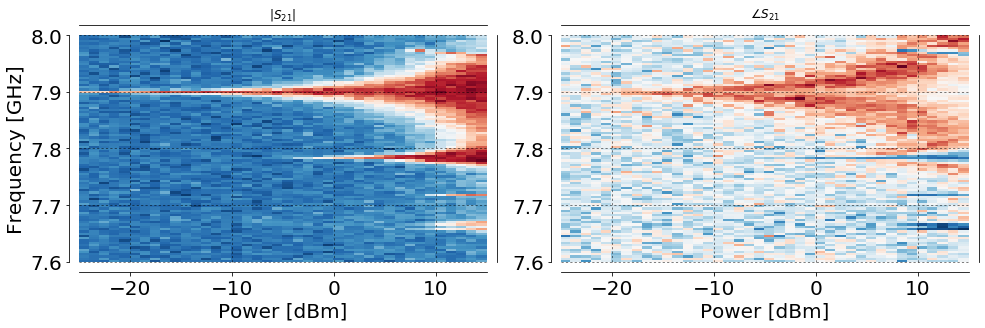

In [168]:
fig, axes = subplots(1, 2, figsize=(14,5), sharey=True)
freqs, curs, s_data = data["frequency"], data["Powed [dBm]"], data["s_data"]
axes[0].pcolormesh(curs, freqs/1e9, abs(s_data).T, cmap="RdBu_r", rasterized=True)

axes[1].pcolormesh(curs, freqs/1e9, angle(s_data).T, cmap="RdBu_r", rasterized=True)
for ax in axes:
    spines(ax)
    ax.axis("tight")
    ax.set_xlabel("Power [dBm]")
    ax.grid()
axes[0].set_ylabel("Frequency [GHz]")
axes[0].set_title("$|S_{21}|$", fontsize=12, position=(0.5,1.05), ha="center")
axes[1].set_title(r"$\angle S_{21}$", fontsize=12, position=(0.5,1.05), ha="center")
tight_layout()
plt.savefig("third-VI-2tone_powerscan.pdf", bbox_inches="tight")

In [202]:
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 24 2017/16-43-50 - VI-ac-stark/VI-ac-stark_raw_data.pkl"
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 24 2017/16-18-44 - VI-ac-stark/VI-ac-stark_raw_data.pkl"
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/Apr 23 2017/00-51-46 - VI-powerscan/VI-powerscan_raw_data.pkl"

In [203]:
with open(file, "rb") as f:
    data = pickle.load(f)

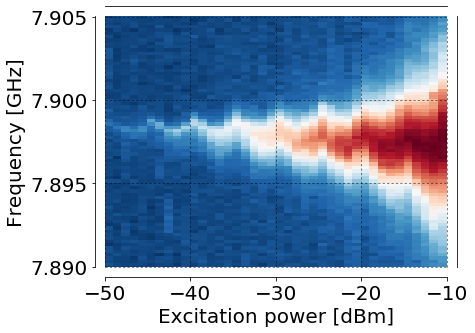

In [210]:
freqs, curs, s_data = data["frequency"], data["Power [dBm]"], data["s_data"]

pcolormesh(curs, freqs/1e9, abs(s_data).T, cmap="RdBu_r", rasterized=True)
spines()
axis("tight")
plt.gcf().set_size_inches(7,5)
plt.ylabel("Frequency [GHz]")
# plt.xlim(-40, /)
plt.ylim(7.89, 7.905)
grid()
xlabel("Excitation power [dBm]")
tight_layout()
plt.savefig("third-VI-linewidth.pdf", bbox_inches="tight")

In [207]:
product(shape(s_data))*5/3600

11.388888888888889

# Third time-resolved

In [226]:
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/16-45-27 - VI-rabi-dispersive-shift-exact-q-freq/VI-rabi-dispersive-shift-exact-q-freq_raw_data.pkl"
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/22-48-05 - VI-rabi-dispersive-shift-exact-q-freq/VI-rabi-dispersive-shift-exact-q-freq_raw_data.pkl"

In [227]:
with open(file, "rb") as f:
    data = pickle.load(f)

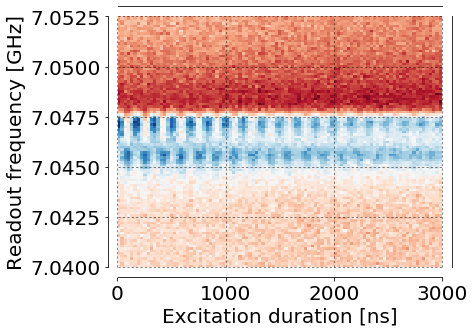

In [229]:
freqs, curs, s_data = data["vna_frequency"], data["excitation_duration"], data["data"]

pcolormesh(curs, freqs/1e9, abs(s_data).T, cmap="RdBu_r", rasterized=True)
spines()
axis("tight")
plt.gcf().set_size_inches(7,5)
plt.ylabel("Readout frequency [GHz]")
# plt.xlim(0, 350)
# plt.ylim(7.89, 7.905)
grid()
xlabel("Excitation duration [ns]")
tight_layout()
plt.savefig("third-VI-disp_rabi_long.pdf", bbox_inches="tight")

In [250]:
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/timedomain_results/May 13 2017/15-27-30 - VI-rabi-shevrons/VI-rabi-shevrons_raw_data.pkl"

In [251]:
with open(file, "rb") as f:
    data = pickle.load(f)

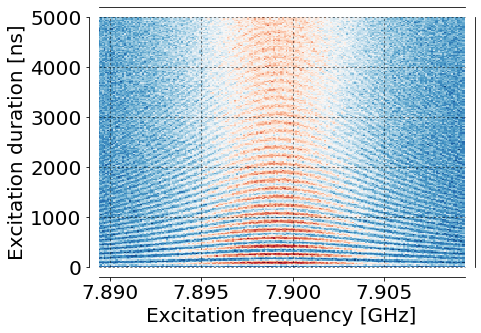

In [252]:
freqs, curs, s_data = data["excitation_frequency"], data["excitation_duration"], data["data"]

pcolormesh(freqs/1e9, curs, real(s_data), cmap="RdBu_r", rasterized=True)
spines()
axis("tight")
plt.gcf().set_size_inches(7,5)
plt.xlabel("Excitation frequency [GHz]")
# plt.xlim(0, 350)
plt.ylim(0, 5e3)
grid()
ylabel("Excitation duration [ns]")
tight_layout()
plt.savefig("third-VI-chevrons.pdf", bbox_inches="tight")

In [253]:
file = "/home/gleb/Документы/Science/Reverse engineering of XMons/Samples/Third chip (Xmon Al BMSTU S444 2)/timedomain_results/May 13 2017/10-36-36 - VI-ramsey-fringes/VI-ramsey-fringes_raw_data.pkl"

In [254]:
with open(file, "rb") as f:
    data = pickle.load(f)

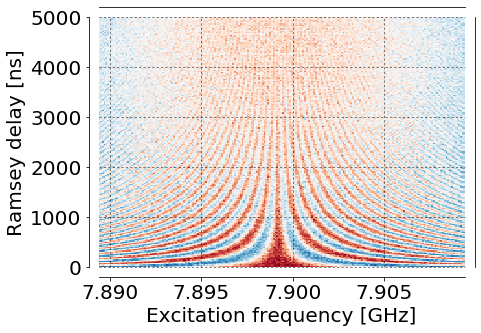

In [256]:
freqs, curs, s_data = data["excitation_frequency"]-50e6, data["ramsey_delay"], data["data"]

pcolormesh(freqs/1e9, curs, real(s_data), cmap="RdBu_r", rasterized=True)
spines()
axis("tight")
plt.gcf().set_size_inches(7,5)
plt.xlabel("Excitation frequency [GHz]")
# plt.xlim(0, 350)
plt.ylim(0, 5e3)
grid()
ylabel("Ramsey delay [ns]")
tight_layout()
plt.savefig("third-VI-fringes.pdf", bbox_inches="tight")